In [79]:
options(stringsAsFactors = F)
library(reshape2)
library(ggplot2)
library(plyr)
library(stringr)
library(MASS)
source("../xtable.r")

In [80]:
if (!file.exists("..//deaths.rds")) {
  deaths <- read.csv(".//data//deaths08.csv.bz2")
  unlink("..//deaths08.csv.bz2")
  deaths$hod[deaths$hod == 99] <- NA
  deaths$hod[deaths$hod == 24] <- 0
  deaths$hod[deaths$hod == 0] <- NA
  deaths$hod <- as.integer(deaths$hod)  
  deaths <- arrange(deaths, yod, mod, dod, hod, cod)
  deaths <- deaths[c("yod", "mod", "dod", "hod", "cod")]
  
  saveRDS(deaths, "../deaths.rds")
}

In [81]:
deaths <- readRDS("..//deaths.rds")

In [82]:
ok <- subset(deaths, yod == 2008 & mod != 0 & dod != 0)
xtable(ok[c(1, 1:14 * 2000), c("yod", "mod", "dod", "hod", "cod")], 
"raw.tex")

In [83]:
codes <- read.csv("..//icd-main.csv")
codes$disease <- sapply(codes$disease, function(x)
  str_c(strwrap(x, width = 30), collapse = "\n"))
names(codes)[1] <- "cod"
codes <- codes[!duplicated(codes$cod), ]

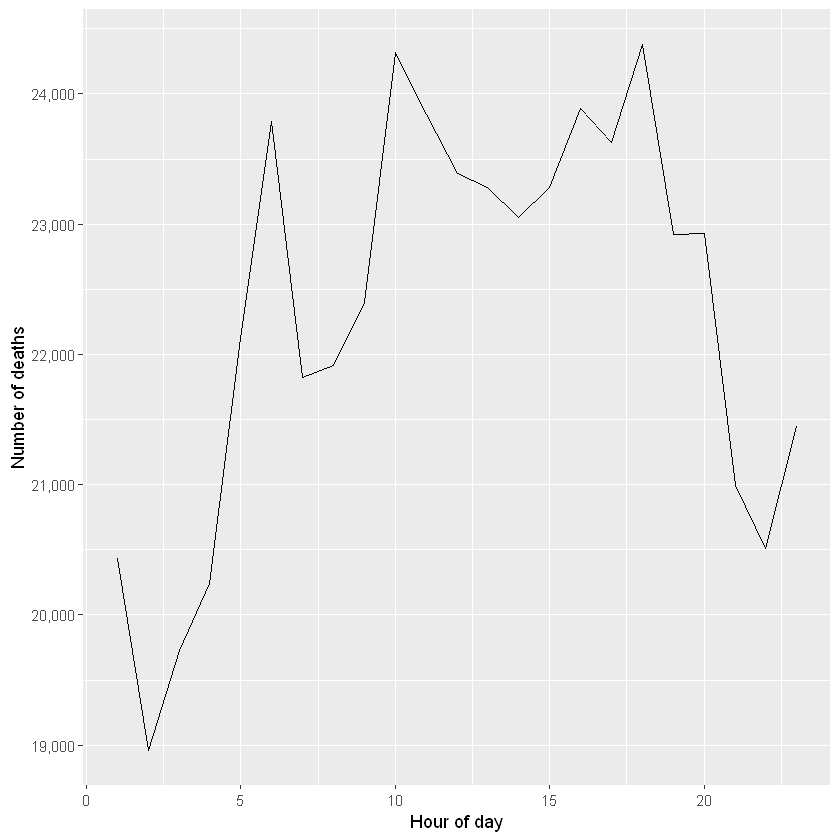

In [84]:
# Display overall hourly deaths
hod_all <- subset(count(deaths, "hod"), !is.na(hod))
qplot(hod, freq, data = hod_all, geom = "line") + 
  scale_y_continuous("Number of deaths", labels = function(x) format(x, big.mark = ",")) + 
  xlab("Hour of day")
ggsave("overall.pdf", width = 10, height = 6)

In [85]:
# Count deaths per hour, per disease
hod2 <- count(deaths, c("cod", "hod"))
hod2 <- subset(hod2, !is.na(hod))
hod2 <- join(hod2, codes)
hod2 <- ddply(hod2, "cod", transform, prop = freq / sum(freq))
xtable(hod2, "hod2.tex", digits=c(3,3,3,3,3,4))
hod2

Joining by: cod


cod,hod,freq,disease,prop
A01,1,3,Typhoid and paratyphoid fevers,0.05769231
A01,2,1,Typhoid and paratyphoid fevers,0.01923077
A01,3,4,Typhoid and paratyphoid fevers,0.07692308
A01,5,5,Typhoid and paratyphoid fevers,0.09615385
A01,6,1,Typhoid and paratyphoid fevers,0.01923077
A01,8,1,Typhoid and paratyphoid fevers,0.01923077
A01,10,2,Typhoid and paratyphoid fevers,0.03846154
A01,11,2,Typhoid and paratyphoid fevers,0.03846154
A01,12,1,Typhoid and paratyphoid fevers,0.01923077
A01,13,6,Typhoid and paratyphoid fevers,0.11538462


In [86]:
# Compare to overall abundance
overall <- ddply(hod2, "hod", summarise, freq_all = sum(freq))
overall <- mutate(overall, prop_all = freq_all / sum(freq_all))
overall

hod,freq_all,prop_all
1,20430,0.03980338
2,18962,0.03694330
3,19729,0.03843763
4,20239,0.03943126
5,22126,0.04310766
6,23787,0.04634376
7,21822,0.04251539
8,21915,0.04269658
9,22401,0.04364344
10,24321,0.04738414


In [87]:
hod2 <- join(overall, hod2, by = "hod")
xtable(hod2, "hod2Overall.tex", digits=c(4,4,4,4,4,4,4,4))
hod2

hod,freq_all,prop_all,cod,freq,disease,prop
1,20430,0.03980338,A01,3,Typhoid and paratyphoid fevers,0.057692308
1,20430,0.03980338,A02,3,Other salmonella infections,0.048387097
1,20430,0.03980338,A04,7,Other bacterial intestinal infections,0.050359712
1,20430,0.03980338,A05,1,"Other bacterial foodborne intoxications, not elsewhere classified",0.047619048
1,20430,0.03980338,A06,2,Amebiasis,0.023809524
1,20430,0.03980338,A09,112,Diarrhea and gastroenteritis of infectious origin,0.036649215
1,20430,0.03980338,A15,2,NA,0.009852217
1,20430,0.03980338,A16,53,"Respiratory tuberculosis, not confirmed bacteriologically or histologically",0.031717534
1,20430,0.03980338,A17,2,Tuberculosis of nervous system,0.021052632
1,20430,0.03980338,A18,5,Tuberculosis of other organs,0.053191489


In [88]:
# Pick better subset of rows to show
cods <- join(arrange(count(deaths, "cod"), desc(freq)), codes)
mutate(tail(subset(cods, freq > 100), 30), disease = str_sub(disease, 1, 30))
cods

Joining by: cod


,cod,freq,disease
321,V04,119,Pedestrian injured in collisio
322,Q23,118,Congenital malformations of ao
323,C51,117,Malignant neoplasm of vulva
324,P91,116,Other disturbances of cerebral
325,X44,116,Accidental poisoning by and ex
326,J68,115,Respiratory conditions due to
327,D35,114,Benign neoplasm of other and u
328,Y57,114,Adverse effects in therapeutic
329,I83,113,Varicose veins of lower extrem
330,J06,113,Acute upper respiratory infect


cod,freq,disease
I21,48869,Acute myocardial infarction
E11,43960,Non-insulin-dependent diabetes mellitus
E14,28293,Unspecified diabetes mellitus
J44,16540,Other chronic obstructive pulmonary disease
K70,13361,Alcoholic liver disease
J18,13070,"Pneumonia, organism unspecified"
K74,13017,Fibrosis and cirrhosis of liver
I25,10413,Chronic ischemic heart disease
X59,9211,Exposure to unspecified factor
I50,8821,Heart failure


In [89]:
hod3 <- subset(hod2, cod %in% c("I21", "N18", "E84", "B16") & hod >= 8 & hod <= 12)[1:15, c("hod", "cod", "disease", "freq", "prop", "freq_all", "prop_all")]
xtable(hod3, "hod3.tex")
hod3

,hod,cod,disease,freq,prop,freq_all,prop_all
4638,8,B16,Acute hepatitis B,4,0.038095238,21915,0.04269658
4787,8,E84,Cystic fibrosis,3,0.029411765,21915,0.04269658
4852,8,I21,Acute myocardial infarction,2205,0.047121426,21915,0.04269658
5028,8,N18,Chronic renal failure,315,0.041241163,21915,0.04269658
5305,9,B16,Acute hepatitis B,7,0.066666667,22401,0.04364344
5473,9,E84,Cystic fibrosis,1,0.009803922,22401,0.04364344
5536,9,I21,Acute myocardial infarction,2209,0.047206907,22401,0.04364344
5707,9,N18,Chronic renal failure,333,0.043597800,22401,0.04364344
5994,10,B16,Acute hepatitis B,10,0.095238095,24321,0.04738414
6153,10,E84,Cystic fibrosis,7,0.068627451,24321,0.04738414


In [90]:
xtable(hod3[c("hod", "cod", "freq")], "counts.tex")
xtable(hod3[c("disease")], "counts-disease.tex")
xtable(hod3[5], "counts-prop.tex")
xtable(hod3[6:7], "counts-all.tex")
xtable(hod3, "hod3-2.tex")
hod3

,hod,cod,disease,freq,prop,freq_all,prop_all
4638,8,B16,Acute hepatitis B,4,0.038095238,21915,0.04269658
4787,8,E84,Cystic fibrosis,3,0.029411765,21915,0.04269658
4852,8,I21,Acute myocardial infarction,2205,0.047121426,21915,0.04269658
5028,8,N18,Chronic renal failure,315,0.041241163,21915,0.04269658
5305,9,B16,Acute hepatitis B,7,0.066666667,22401,0.04364344
5473,9,E84,Cystic fibrosis,1,0.009803922,22401,0.04364344
5536,9,I21,Acute myocardial infarction,2209,0.047206907,22401,0.04364344
5707,9,N18,Chronic renal failure,333,0.043597800,22401,0.04364344
5994,10,B16,Acute hepatitis B,10,0.095238095,24321,0.04738414
6153,10,E84,Cystic fibrosis,7,0.068627451,24321,0.04738414


In [91]:
devi <- ddply(hod2, "cod", summarise, n = sum(freq), 
  dist = mean((prop - prop_all)^2))
devi <- subset(devi, n > 50)
write.csv(devi, file = "devi.csv")
devi

,cod,n,dist
1,A01,52,8.919359e-04
2,A02,62,7.380250e-04
4,A04,139,1.982786e-04
6,A06,84,4.395620e-04
9,A09,3056,2.838672e-05
10,A15,203,2.193798e-04
11,A16,1671,3.011706e-05
12,A17,95,5.036123e-04
13,A18,94,5.806108e-04
14,A19,151,3.773045e-04


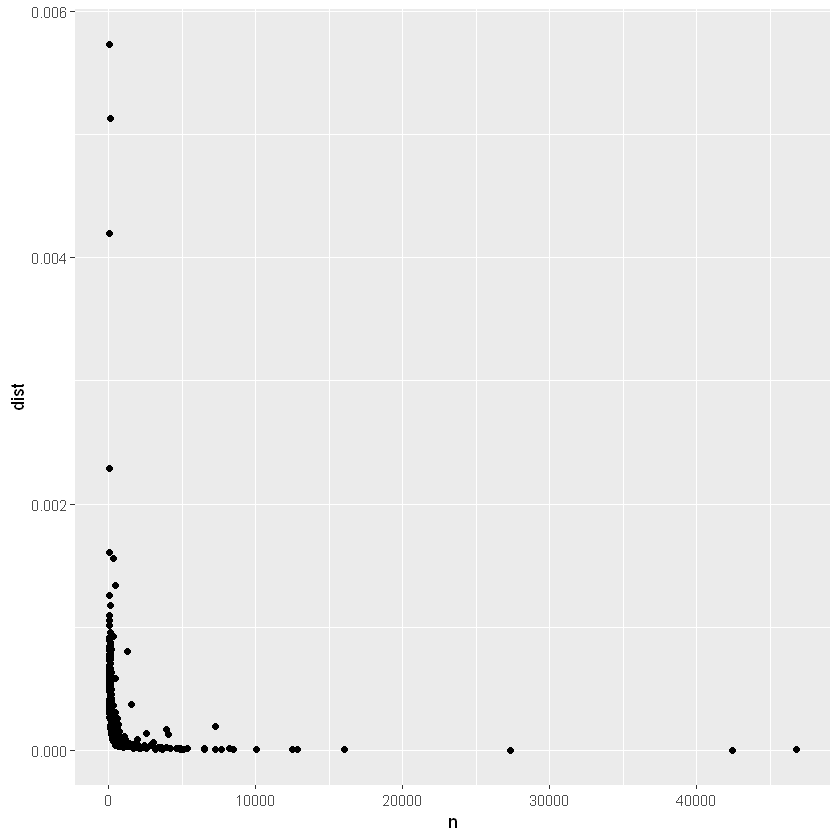

In [92]:
# Find outliers
xlog10 <- scale_x_log10(
  breaks = c(100, 1000, 10000), 
  labels = c(100, 1000, 10000), 
  minor_breaks = log10(outer(1:9, 10^(1:5), "*")))
ylog10 <- scale_y_log10(
  breaks = 10 ^ -c(3, 4, 5), 
  labels = c("0.001", "0.0001", "0.00001"),
minor_breaks = log10(outer(1:9, 10^-(3:6), "*")))

qplot(n, dist, data = devi)
ggsave("n-dist-raw.pdf", width = 6, height = 6)

Warning message in self$trans$transform(self$minor_breaks):
"Se han producido NaNs"

Warning message in self$trans$transform(self$minor_breaks):
"Se han producido NaNs"

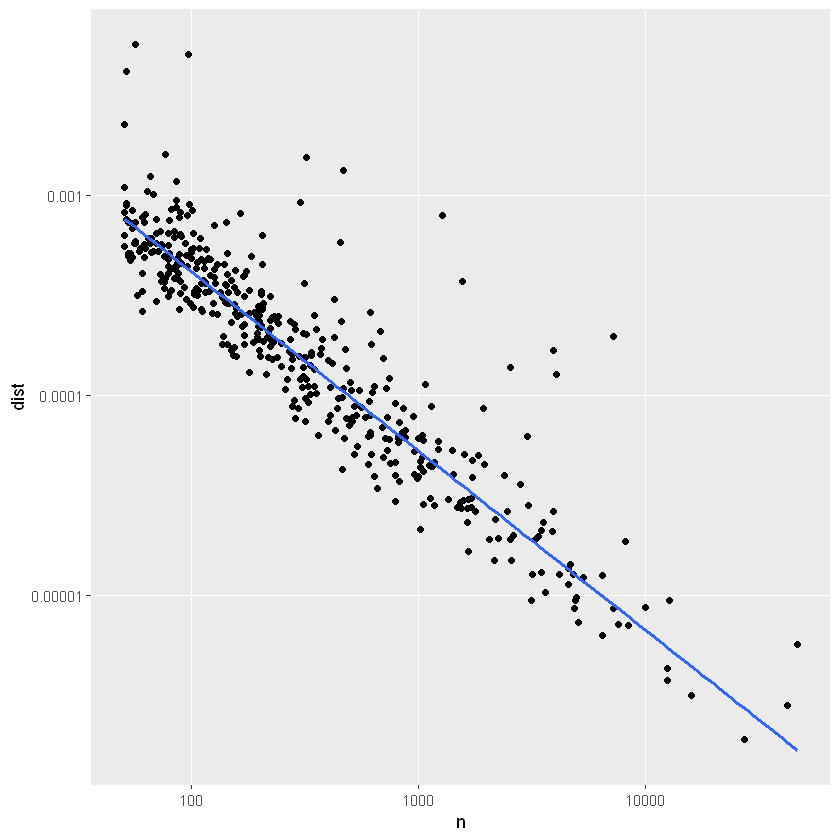

In [93]:
qplot(n, dist, data = devi) + 
  geom_smooth(method = "rlm", se = F) + 
  xlog10 + 
  ylog10
ggsave("n-dist-log.pdf", width = 6, height = 6)

(Intercept)      log(n) 
 -3.6471353  -0.8970054

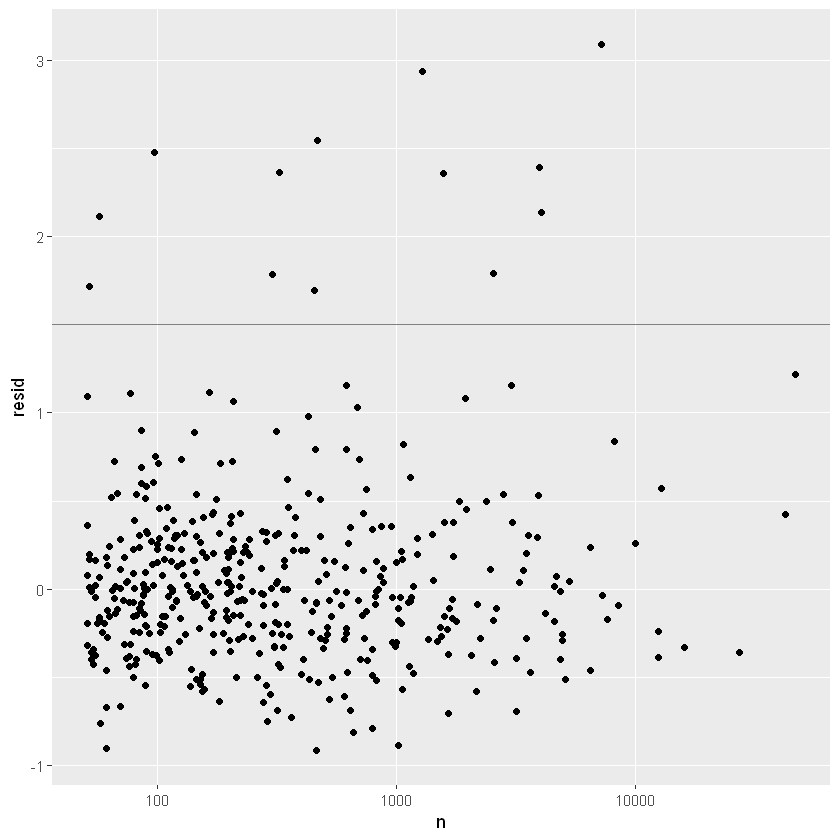

In [94]:
devi$resid <- resid(rlm(log(dist) ~ log(n), data = devi))
coef(rlm(log(dist) ~ log(n), data = devi))
ggplot(devi, aes(n, resid)) + 
  geom_hline(yintercept = 1.5, colour = "grey50") +
  geom_point() + 
  xlog10
ggsave("n-dist-resid.pdf", width = 6, height = 6)

In [95]:
unusual <- subset(devi, resid > 1.5)
unusual

,cod,n,dist,resid
914,R95,323,0.0015581861,2.365488
923,V09,3956,0.0001685116,2.388515
970,V79,52,0.0041936382,1.717236
976,V87,2545,0.0001378894,1.792291
978,V89,4061,0.0001277622,2.135180
984,V95,57,0.0057310860,2.111924
1044,W69,469,0.0013346910,2.545204
1046,W73,303,0.0009234664,1.785009
1047,W74,1283,0.0008008116,2.937079
1059,W87,456,0.0005847901,1.694787


In [96]:
hod_unusual_big <- match_df(hod2, subset(unusual, n > 350))
hod_unusual_big

Matching on: cod


,hod,freq_all,prop_all,cod,freq,disease,prop
540,1,20430,0.03980338,V09,148,Pedestrian injured in other and unspecified transport accidents,0.03741153
562,1,20430,0.03980338,V87,123,Traffic accident of specified type but victim's mode of transport unknown,0.04833006
563,1,20430,0.03980338,V89,201,"Motor- or nonmotor-vehicle accident, type of vehicle unspecified",0.04949520
582,1,20430,0.03980338,W69,7,Drowning and submersion while in natural water,0.01492537
585,1,20430,0.03980338,W74,17,Unspecified drowning and submersion,0.01325019
592,1,20430,0.03980338,W87,11,Exposure to unspecified electric current,0.02412281
625,1,20430,0.03980338,X95,436,Assault (homicide) by other and unspecified firearm discharge,0.06032097
628,1,20430,0.03980338,X99,134,Assault (homicide) by sharp object,0.08507937
1185,2,18962,0.03694330,V09,141,Pedestrian injured in other and unspecified transport accidents,0.03564206
1207,2,18962,0.03694330,V87,113,Traffic accident of specified type but victim's mode of transport unknown,0.04440079


In [97]:
hod_unusual_sml <- match_df(hod2, subset(unusual, n <= 350))
hod_unusual_sml

Matching on: cod


,hod,freq_all,prop_all,cod,freq,disease,prop
532,1,20430,0.03980338,R95,13,Sudden infant death syndrome,0.04024768
584,1,20430,0.03980338,W73,7,Other specified drowning and submersion,0.02310231
1179,2,18962,0.03694330,R95,21,Sudden infant death syndrome,0.06501548
1204,2,18962,0.03694330,V79,2,Bus occupant injured in other and unspecified transport accidents,0.03846154
1231,2,18962,0.03694330,W73,1,Other specified drowning and submersion,0.00330033
1255,2,18962,0.03694330,X33,1,Victim of lightning,0.01030928
1833,3,19729,0.03843763,R95,29,Sudden infant death syndrome,0.08978328
1856,3,19729,0.03843763,V79,15,Bus occupant injured in other and unspecified transport accidents,0.28846154
1889,3,19729,0.03843763,W73,10,Other specified drowning and submersion,0.03300330
2491,4,20239,0.03943126,R95,35,Sudden infant death syndrome,0.10835913


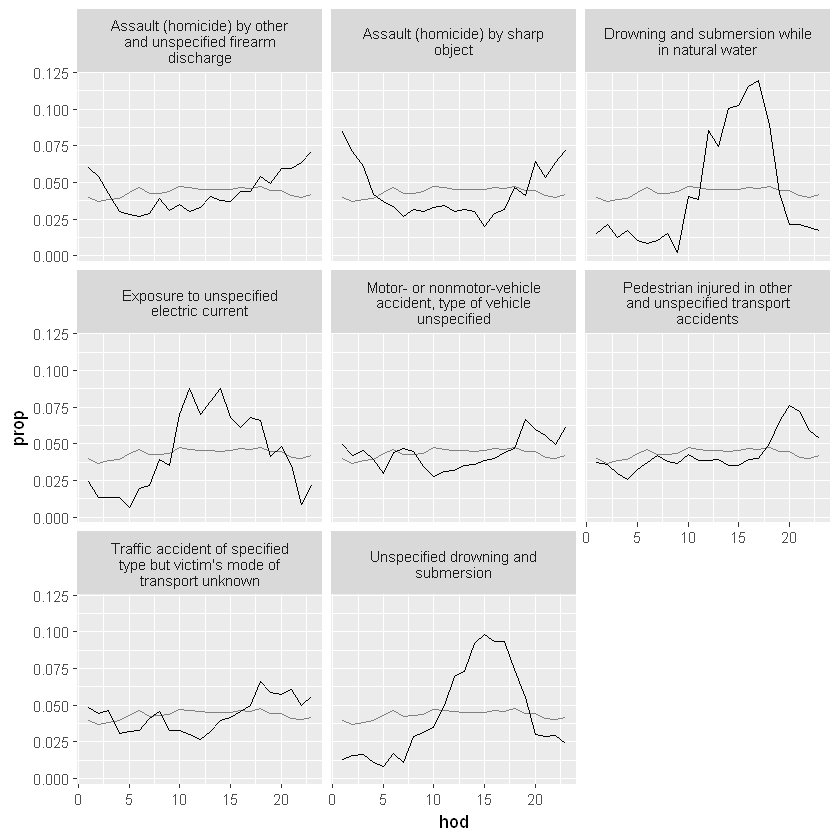

In [98]:
ggplot(hod_unusual_big, aes(hod, prop)) + 
  geom_line(aes(y = prop_all), data = overall, colour = "grey50") +
  geom_line() + 
  facet_wrap(~ disease, ncol = 3)
ggsave("unusual-big.pdf", width = 8, height = 6)

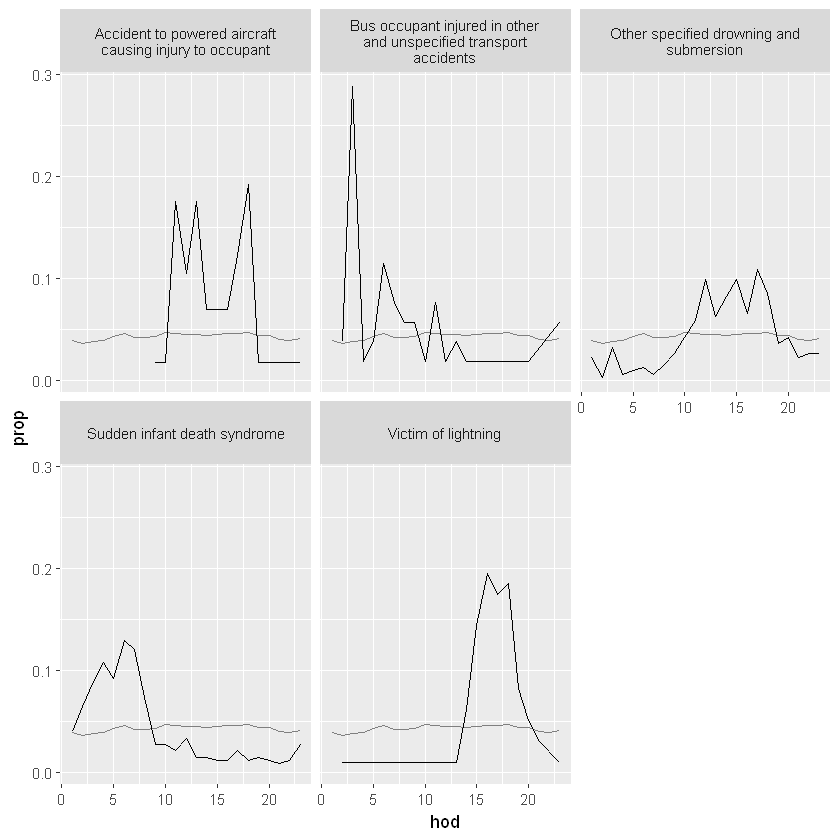

In [99]:
last_plot() %+% hod_unusual_sml
ggsave("unusual-sml.pdf", width = 8, height = 4)